# Proyek Analisis Data: Bike Sharing Dataset 🚴🏼‍♂️🚴🏼‍♀️
- **Nama:** Muhamad Fajri Permana Haryanto
- **Email:** muhamadfajri2804@gmail.com
- **ID Dicoding:** mijimo

## Tujuan Analisis ⛳

Dataset Bike Sharing dari Kaggle mencatat data historis penyewaan sepeda berdasarkan berbagai variabel, seperti waktu (jam, hari, bulan, dan musim), kondisi cuaca, serta tipe pengguna (kasual dan terdaftar).


Tujuan dari analisis ini adalah untuk mengidentifikasi pola penggunaan sepeda dan memahami faktor-faktor yang memengaruhi tingkat penyewaan. Dengan mengeksplorasi tren harian, musiman, serta perilaku pelanggan, hasil analisis ini dapat memberikan wawasan yang berguna bagi pengelola layanan berbagi sepeda dalam mengoptimalkan operasional dan strategi bisnis.

## Menentukan Pertanyaan Bisnis 📑

1️⃣ Bagaimana Tren Penyewaan Sepeda Sepanjang Hari? (Line Chart)

2️⃣ Bagaimana Pola Penyewaan Sepeda Selama Perminggu dan Perbulannya? (Bar Chart)

3️⃣ Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Musim? (Pie Chart)

4️⃣ Bagaimana Perbandingan Penyewaan Sepeda Antara Pengguna Kasual dan Terdaftar? (Line Chart)

5️⃣ Pada Hari Apa Penyewaan Sepeda Mencapai Jumlah Tertinggi dan Terendah? (Bar Chart)

6️⃣ Bagaimana Perilaku Penyewaan Pelanggan Berdasarkan RFM Analysis? (Bar Chart - Histograms)
  * Recency: Seberapa baru pelanggan terakhir menyewa sepeda
  * Frequency: Seberapa sering pelanggan menyewa sepeda
  * Monetary: Total penyewaan yang telah dilakukan pelanggan

7️⃣ Bagaimana Pola Penyewaan Sepeda Berdasarkan Kategori Waktu? (Horizontal Bar Chart)

## Import Semua Packages/Library yang Digunakan 🗃️

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling 🧰

### Gathering Data 🎫

#### Masukan file dataset dari kaggle

In [2]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

#### Load data set hari (day_df)

In [3]:
file_path = os.path.join(path, 'day.csv')
day_df = pd.read_csv(file_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load data set jam (hour_df)

In [4]:
file_path = os.path.join(path, 'hour.csv')
hour_df = pd.read_csv(file_path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Jika menggunakan Vs Code

**Untuk load data day.csv**

In [5]:
# day_df = pd.read_csv("data_set/day.csv")
# day_df.head()

**Untuk load data hour.csv**

In [6]:
# hour_df = pd.read_csv("data_set/hour.csv")
# hour_df.head()

### Assessing Data 💯

#### Menilai data set day_df

**Mengecek tipe data**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Mengecek nilai unik/variasi**

In [8]:
day_df.apply(lambda x: len(x.unique()))

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Mengecek jumlah missing value / nilai kosong**

In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Mengecek jumlah duplikasi**

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Melihat gambaran isi data**

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan beberapa pengecekan, dinyatakan bahwa **dataset (day.csv/day_df) ini bersih dari duplikasi dan missing value**, serta data set inih bisa digunakan untuk analisis lebih lanjut lagi.

#### Menilai data hour_df

**Mengecek tipe data**

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Mengecek nilai unik/variasi**

In [13]:
hour_df.apply(lambda x: len(x.unique()))

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Mengecek jumlah missing value / nilai kosong**

In [14]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Mengecek jumlah duplikasi**

In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Melihat gambaran isi data**

In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah dilakukan beberapa pengecekan, dinyatakan bahwa **dataset (hour.csv/hour_df) ini bersih dari duplikasi dan missing value**, serta data set inih bisa digunakan untuk analisis lebih lanjut lagi.

### Cleaning Data 💖

#### Merapihkan data day_df

##### Mengubah tipe data tanggal ke format yang sesuai (date time)

In [17]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

##### Mengubah tipe data numerical ke tipe data kategorical

**Agar mempermudah melakukan analisi maka, diputuskan mengubah kolom numerical menjadi kategorical, agar visualisi data bisa lebih mudah dan jelas**

In [18]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')

##### Mengecek rentan nilai numerical

In [19]:
print(day_df[['temp', 'atemp', 'hum', 'windspeed']].describe())

             temp       atemp         hum   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.627894    0.190486
std      0.183051    0.162961    0.142429    0.077498
min      0.059130    0.079070    0.000000    0.022392
25%      0.337083    0.337842    0.520000    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463


Berdasarkan statistik deskriptif dari kolom numerik (temp, atemp, hum, windspeed) disimpulkan bahwa:

1️⃣ Kolom temp dan atemp (suhu), dalam posisi rentan aman dan juga ternormalisis datanya ✅

2️⃣ Kolom hum (kelembapan), terdapat skala terkecil 0.000000, mungkin inih akan di tangani lebih lanjut lagi 🛠️

3️⃣ Kolom windspeed (kecepatan angin), Cukup aman ✅

**Penanganan kolom hum (Humidity/kelembapan)**

In [20]:
day_df[day_df['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


karena jumlahnya kecil (cuman 1 kolom), jadi diputuskan diganti dengan median

In [21]:
day_df.loc[day_df['hum'] == 0, 'hum'] = day_df['hum'].median()

##### Mengecek Logika Data

**Memeriksa cnt (total penyewaan) adalah jumlah dari casual dan registered**

Jika hasil TRUE berarti bahwa nilai total cnt = (casual + registered) sesuai jumlahnya

In [22]:
(day_df['cnt'] == day_df['casual'] + day_df['registered']).all()

True

##### Mengecek Proporsi perKategori

**Memeriksa distribusi nilai dalam kolom kategorikal apakah jumlahnnya sesuai 100% dan juga sesuai dengan deskpsi yang dikasih pada kaggle**

###### 1. **Kolom season (Musim)**

In [23]:
for col in ['season']:
    print(f"\n{col}:\n{day_df[col].value_counts(normalize=True) * 100}")


season:
season
3    25.718194
2    25.170999
1    24.760602
4    24.350205
Name: proportion, dtype: float64


  * Kategori: 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter,
  * Semua musim memiliki proporsi yang hampir sama (-+25%) dan juga sesui dengan yang ada pada data set.
  * ✅ Tidak ada nilai aneh, distribusi musim terlihat wajar dan rata.

###### 2. **Kolom yr (Tahun)**

In [24]:
for col in ['yr']:
    print(f"\n{col}:\n{day_df[col].value_counts(normalize=True) * 100}")


yr:
yr
1    50.068399
0    49.931601
Name: proportion, dtype: float64


  * Kategori:
    * 0 = 2011
    * 1 = 2012
  * Hasil Proporsi:
    * 2011 = 49.93%
    * 2012 = 50.07%
  * ✅ Tidak ada kejanggalan, karena dataset mencakup 2 tahun penuh, sehingga proporsi juga hampir seimbang.

###### 3. **Kolom mnth (Bulan)**

In [25]:
for col in ['mnth']:
    print(f"\n{col}:\n{day_df[col].value_counts(normalize=True) * 100}")


mnth:
mnth
1     8.481532
3     8.481532
5     8.481532
7     8.481532
8     8.481532
10    8.481532
12    8.481532
4     8.207934
6     8.207934
9     8.207934
11    8.207934
2     7.797538
Name: proportion, dtype: float64


  * Kategori:
    * 1. (Jan), 2. (Feb), 3. (Mrt), 4. (Apr), 5. (Mei), 6. (Jun),
    * 7. (Jul), 8. (Ags), 9. (Sep), 10. (Okt), 11. (Nov), 12. (Des).
  * Hasil Proporsi: Setiap bulan memiliki proporsi 7-8%,
  * ✅ Tidak ada kejanggalan, distribusi bulan terlihat normal.

###### 4. **Kolom holiday (Hari Libur)**

In [26]:
for col in ['holiday']:
    print(f"\n{col}:\n{day_df[col].value_counts(normalize=True) * 100}")


holiday:
holiday
0    97.127223
1     2.872777
Name: proportion, dtype: float64


  * Kategori:
    * 0 = Bukan hari libur
    * 1 = Hari libur
  * Hasil Proporsi:
    * Hari kerja (0) = 97.13%
    * Hari libur (1) = 2.87%
  * ✅ Ini wajar karena hari libur nasional jauh lebih sedikit dibanding hari libur biasa (sabtu, minggu).

###### 5. **Kolom weekday (Hari dalam Seminggu)**

In [27]:
for col in ['weekday']:
    print(f"\n{col}:\n{day_df[col].value_counts(normalize=True) * 100}")


weekday:
weekday
0    14.363885
1    14.363885
6    14.363885
2    14.227086
3    14.227086
4    14.227086
5    14.227086
Name: proportion, dtype: float64


 * 0 = Senin, 1 = Selasa, 2 = Rabu, 3 = Kamis, 4 = Jumat, 5= Sabtu, 6 = Minggu
 * Semua hari memiliki proporsi sekitar 14%, yang wajar untuk dataset selama 2 tahun penuh.
 * ✅ Tidak ada kejanggalan, distribusi terlihat normal.

###### 6. **Kolom workingday (Hari Kerja)**


In [28]:
for col in ['workingday']:
    print(f"\n{col}:\n{day_df[col].value_counts(normalize=True) * 100}")


workingday:
workingday
1    68.399453
0    31.600547
Name: proportion, dtype: float64


  * Kategori:
    * 0 = Bukan hari kerja (Sabtu/Minggu/hari libur)
    * 1 = Hari kerja (Senin-Jumat kecuali hari libur)
  * Hasil Proporsi:
    * Hari kerja (1) = 68.40%
    * Hari non-kerja (0) = 31.60%
  * ✅ Tidak ada kejanggalan, proporsi sesuai dengan jumlah hari kerja dalam satu tahun (~250 hari kerja dari 365).

###### 7. **Kolom weathersit (Kondisi Cuaca)**

In [29]:
for col in ['weathersit']:
    print(f"\n{col}:\n{day_df[col].value_counts(normalize=True) * 100}")


weathersit:
weathersit
1    63.337893
2    33.789330
3     2.872777
Name: proportion, dtype: float64


  * Kategori:
    * 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
    * 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
    * 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Bertebaran, Hujan Ringan + Awan Bertebaran
    * 4: Hujan Lebat + Es Batu + Badai Petir + Kabut, Salju + Kabut
  * Hasil Proporsi:
    * 1 (Clear) = 63.34% → Wajar, cuaca cerah lebih sering terjadi
    * 2 (Mist/Cloudy) = 33.79% → Masih wajar, karena cuaca berawan sering
    * 3 (Light Rain/Snow) = 2.87% → Masih dalam batas normal, karena diluar negeri sering turun salju ringin

  * 🟡 Tidak ada 4 (Heavy Rain/Snow)?


In [30]:
print(day_df['weathersit'].value_counts())

weathersit
1    463
2    247
3     21
Name: count, dtype: int64


**Nah mungkin, cuaca salju lebat dan hujan lebat mungkin jarang terjadi sama sekali**

#### Merapihkan data hour_df

##### Mengubah tipe data tanggal ke format yang sesuai (date time)

In [31]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

##### Mengubah tipe data numerical ke tipe data kategorical

In [32]:
kategori_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
hour_df[kategori_cols] = hour_df[kategori_cols].astype('category')

##### Mengecek proporsi perKategori

###### 1. **Kolom season (Musim)**

In [33]:
for col in ['season']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


season:
season
3    25.870303
2    25.369699
1    24.408769
4    24.351228
Name: proportion, dtype: float64


  * Nilai season berkisar dari 1 hingga 4 (berarti tidak ada nilai outlier).
  * Distribusi hampir merata, masing-masing musim memiliki proporsi sekitar 25%.
  * ✅ Tidak perlu penanganan khusus karena ini sudah proporsional.

###### 2. **Kolom year (Tahun)**

In [34]:
for col in ['yr']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


yr:
yr
1    50.256056
0    49.743944
Name: proportion, dtype: float64


  * yr = 0 → Tahun pertama (2011), yr = 1 → Tahun kedua (2012).
  * Proporsinya hampir seimbang (50:50), sehingga dataset mencakup kedua tahun dengan baik.
  * ✅ Tidak ada masalah.

###### 3. **Kolom mounth (Bulan)**

In [35]:
for col in ['mnth']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


mnth:
mnth
5     8.562058
7     8.562058
12    8.533287
8     8.487255
3     8.475747
10    8.349157
6     8.285862
4     8.268600
9     8.268600
11    8.268600
1     8.222567
2     7.716209
Name: proportion, dtype: float64


  * Proporsi bulan hampir merata dengan sedikit variasi (sekitar 7.7% - 8.6%).
  * Tidak ada bulan yang hilang (1-12 ada semua).
  * ✅ Tidak ada kejanggalan, distribusi terlihat normal.

###### 4. **Kolom holiday (Hari Libur)**

In [36]:
for col in ['holiday']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


holiday:
holiday
0    97.122964
1     2.877036
Name: proportion, dtype: float64


* Hanya 2.88% dari data merupakan hari libur.
* ✅ Ini masuk akal karena hari libur (misalnya nasional) jauh lebih sedikit dibanding hari kerja.

###### 5. **Kolom weekday (Hari dalam Seminggu)**

In [37]:
for col in ['weekday']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


weekday:
weekday
6    14.454226
0    14.396686
5    14.310375
1    14.264342
3    14.241326
4    14.218309
2    14.114736
Name: proportion, dtype: float64


  * Semua hari (0-6) memiliki distribusi hampir merata (~14%).
  * ✅ Tidak ada hari yang hilang atau tidak proporsional.

###### 6. **Kolom workingday (Hari Kerja)**

In [38]:
for col in ['workingday']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


workingday:
workingday
1    68.272052
0    31.727948
Name: proportion, dtype: float64


  * Sekitar 68.3% adalah hari kerja dan 31.7% hari libur (termasuk akhir pekan).
  * ✅ Ini masuk akal karena hari kerja lebih banyak dalam setahun dibanding akhir pekan.

###### 7. **Kolom weathersit (Kondisi Cuaca)**

In [39]:
for col in ['weathersit']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


weathersit:
weathersit
1    65.671212
2    26.146499
3     8.165027
4     0.017262
Name: proportion, dtype: float64


  * Mayoritas cuaca cerah/biasa (65.67%), disusul mendung (26.15%), dan hujan ringan (8.17%).
  * Cuaca ekstrem (kode 4) hanya muncul 0.02%, sangat jarang.

  * 🟡 Karena cuaca ekstream kecil banget jadi diputuskan, menggabungkan kategori 4 ke kategori 3.

In [40]:
hour_df['weathersit'] = hour_df['weathersit'].astype(str)
hour_df['weathersit'] = hour_df['weathersit'].replace('4', '3')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [41]:
for col in ['weathersit']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


weathersit:
weathersit
1    65.671212
2    26.146499
3     8.182289
Name: proportion, dtype: float64


###### 7. **Kolom hour (Jam)**

In [42]:
for col in ['hr']:
    print(f"\n{col}:\n{hour_df[col].value_counts(normalize=True) * 100}")


hr:
hr
17    4.200472
16    4.200472
13    4.194718
15    4.194718
14    4.194718
12    4.188964
22    4.188964
21    4.188964
20    4.188964
19    4.188964
18    4.188964
23    4.188964
11    4.183210
10    4.183210
9     4.183210
8     4.183210
7     4.183210
0     4.177456
6     4.171701
1     4.165947
5     4.125669
2     4.114161
4     4.010587
3     4.010587
Name: proportion, dtype: float64


  * Semua jam (0-23) ada, tidak ada yang hilang.
  * Distribusi hampir merata (~4.18% tiap jam).
  * Jam sibuk (16-17) sedikit lebih tinggi (~4.20%), mungkin karena jam pulang kerja.
  * ✅aman dan tidak ada outlier

##### Mengecek Jam dalam Sehari (hr)

In [43]:
missing_hours = set(range(24)) - set(hour_df['hr'].unique())
print("Jam yang hilang:", missing_hours)

Jam yang hilang: set()


**Dinyatakan bahwa tidak ada jam yang hilang**

##### Mengecek Anomali pada Data Numerik (temp, atemp, hum, windspeed)

In [44]:
hour_df[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


###### Menangani nilai kolom atemp yang Memiliki Nilai 0

In [45]:
zero_atemp = hour_df[hour_df['atemp'] == 0]
print("Jumlah data dengan atemp = 0:", zero_atemp.shape[0])

Jumlah data dengan atemp = 0: 2


**Karena cuman ada 2 jadi diputuskan untuk diisi dengan rata-rata atemp berdasarkan suhu (temp) yang mendekati, agar untuk menjaga variasi data dan informasi lebih sesuai.**

In [46]:
hour_df.loc[hour_df['atemp'] == 0, 'atemp'] = hour_df['temp'] * (hour_df['atemp'].mean() / hour_df['temp'].mean())

###### Menangani nilai kolom hum yang Memiliki Nilai 0

In [47]:
zero_hum = hour_df[hour_df['hum'] == 0]
print("Jumlah data dengan hum = 0:", zero_hum.shape[0])

Jumlah data dengan hum = 0: 22


In [48]:
hour_df['hum'] = hour_df.groupby('dteday')['hum'].transform(lambda x: x.mask(x == 0, x[x > 0].mean()))

###### Menangani nilai kolom windspeed yang Memiliki Nilai 0

In [49]:
zero_windspeed = hour_df[hour_df['windspeed'] == 0]
print("Jumlah data dengan windspeed = 0:", zero_windspeed.shape[0])

Jumlah data dengan windspeed = 0: 2180


In [50]:
total_hours = hour_df.shape[0]
total_zero_windspeed = zero_windspeed.shape[0]
percentage_zero_windspeed = (zero_windspeed.shape[0] / total_hours) * 100
percentage_non_zero_windspeed = 100 - percentage_zero_windspeed

comparison = {
    "Total Data hours": total_hours,
    "Data dengan kecepatan angin 0": total_zero_windspeed,
    "Persentase kecepatan angin 0": percentage_zero_windspeed,
    "Persentase tidak kecepatan angin 0": percentage_non_zero_windspeed
}
comparison

{'Total Data hours': 17379,
 'Data dengan kecepatan angin 0': 2180,
 'Persentase kecepatan angin 0': 12.543874791414927,
 'Persentase tidak kecepatan angin 0': 87.45612520858508}

Diputuskan karena lumayan besar **12,53%** diputuskan **menggunakan median** lebih stabil dibanding mean karena **tidak terpengaruh outlier**. Karena kecepatan angin dipengaruhi oleh kondisi cuaca (weathersit), **mengganti nilai 0 dengan median dalam setiap kategori weathersit** menjaga konsistensi data tanpa menambah bias.

In [51]:
hour_df['windspeed'] = hour_df['windspeed'].mask(
    hour_df['windspeed'] == 0,
    hour_df.groupby('weathersit', observed=True)['windspeed'].transform('median')
)

###### Meninjau ulang kembali

In [52]:
hour_df[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17357.000000,17379.000000
mean,0.496987,0.475778,0.628024,0.213455
std,0.192556,0.171841,0.191754,0.099557
min,0.020000,0.015200,0.080000,0.089600
25%,0.340000,0.333300,0.480000,0.134300
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


##### Mengecek duplikasi dalam Waktu (dteday, hr)

**Karena ini data per jam, setiap kombinasi dteday dan hr harus unik.**

Kalau Hasilnnya 0 maka tidak da duplikasi dalam jam yang sama untuk satu hari.

In [53]:
duplicate_hours = hour_df.duplicated(subset=['dteday', 'hr'], keep=False)
print("Jumlah duplikasi berdasarkan tanggal & jam:", duplicate_hours.sum())

Jumlah duplikasi berdasarkan tanggal & jam: 0


## Exploratory Data Analysis (EDA) ⛏️

### Exploratory Tiap Tabel 💎

#### Explore day_df

In [54]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606
330,331,2011-11-27,4,0,11,0,0,0,1,0.459167,0.455800,0.698333,0.208954,810,2261,3071
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569
590,591,2012-08-13,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883
610,611,2012-09-02,3,1,9,0,0,0,2,0.696667,0.649000,0.815000,0.064071,2613,3197,5810


In [55]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menampilkan tanggal pertama dan terakhir dalam dataset**

In [56]:
print("Tanggal pertama:", day_df['dteday'].min())
print("Tanggal terakhir:", day_df['dteday'].max())

Tanggal pertama: 2011-01-01 00:00:00
Tanggal terakhir: 2012-12-31 00:00:00


**Menghitung jumlah data per tahun**

In [57]:
print(day_df['yr'].value_counts())

yr
1    366
0    365
Name: count, dtype: int64


**Menghitung jumlah data per bulan**

In [58]:
print(day_df['mnth'].value_counts())

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64


**Menghitung jumlah data per hari dalam seminggu**

In [59]:
print(day_df['weekday'].value_counts())

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64


**Menghitung jumlah total hari libur dan hari kerja dalam dataset**

In [60]:
print(day_df['holiday'].value_counts())
print(day_df['workingday'].value_counts())

holiday
0    710
1     21
Name: count, dtype: int64
workingday
1    500
0    231
Name: count, dtype: int64


**Melihat jumlah data untuk setiap kategori cuaca**

In [61]:
print(day_df['weathersit'].value_counts())

weathersit
1    463
2    247
3     21
Name: count, dtype: int64


**Melihat hari dengan jumlah penyewa tertinggi dan terendah**

In [62]:
top_10_highest = day_df[['dteday', 'casual', 'registered', 'cnt']].nlargest(10, 'cnt')
print("10 Hari dengan Jumlah Penyewa Tertinggi:")
top_10_highest

10 Hari dengan Jumlah Penyewa Tertinggi:


,dteday,casual,registered,cnt
623,2012-09-15,3160,5554,8714
637,2012-09-29,2589,5966,8555
630,2012-09-22,2512,5883,8395
447,2012-03-23,2469,5893,8362
504,2012-05-19,3410,4884,8294
617,2012-09-09,2570,5657,8227
571,2012-07-25,1383,6790,8173
629,2012-09-21,1250,6917,8167
643,2012-10-05,1516,6640,8156
518,2012-06-02,2795,5325,8120


In [63]:
top_10_lowest = day_df[['dteday', 'casual', 'registered', 'cnt']].nsmallest(10, 'cnt')
print("\n10 Hari dengan Jumlah Penyewa Terendah:")
top_10_lowest


10 Hari dengan Jumlah Penyewa Terendah:


,dteday,casual,registered,cnt
667,2012-10-29,2,20,22
26,2011-01-27,15,416,431
725,2012-12-26,9,432,441
25,2011-01-26,34,472,506
64,2011-03-06,114,491,605
68,2011-03-10,46,577,623
301,2011-10-29,57,570,627
17,2011-01-18,9,674,683
340,2011-12-07,50,655,705
358,2011-12-25,303,451,754


**Melihat jumlah penyewa dengan keadaan hari suhu tertinggi & terendah**

In [64]:
top_5_hottest = day_df[['dteday', 'temp', 'cnt']].nlargest(5, 'temp')
print("5 Hari dengan Suhu Tertinggi:")
top_5_hottest

5 Hari dengan Suhu Tertinggi:


,dteday,temp,cnt
553,2012-07-07,0.861667,4840
203,2011-07-23,0.849167,3285
202,2011-07-22,0.848333,3387
209,2011-07-29,0.838333,3846
545,2012-06-29,0.834167,5463


In [65]:
top_5_coldest = day_df[['dteday', 'temp', 'cnt']].nsmallest(5, 'temp')
print("5 Hari dengan Suhu Terendah:")
top_5_coldest

5 Hari dengan Suhu Terendah:


,dteday,temp,cnt
21,2011-01-22,0.059130,981
22,2011-01-23,0.096522,986
23,2011-01-24,0.097391,1416
368,2012-01-04,0.107500,2368
407,2012-02-12,0.127500,1529


**Melihat jumlah penyewa dengan keadaan hari yang Kecepatan angin (windspeed) tertinggi & terendah**

In [66]:
top_5_windspeed_high = day_df[['dteday', 'windspeed', 'cnt']].nlargest(5, 'windspeed')
print("5 Hari dengan Kecepatan Angin Tertinggi:")
top_5_windspeed_high

5 Hari dengan Kecepatan Angin Tertinggi:


,dteday,windspeed,cnt
49,2011-02-19,0.507463,1635
432,2012-03-08,0.441563,5382
292,2011-10-20,0.422275,4195
420,2012-02-25,0.421642,2732
44,2011-02-14,0.417908,1913


In [67]:
top_5_windspeed_low = day_df[['dteday', 'windspeed', 'cnt']].nsmallest(5, 'windspeed')
print("5 Hari dengan Kecepatan Angin Terendah:")
top_5_windspeed_low

5 Hari dengan Kecepatan Angin Terendah:


,dteday,windspeed,cnt
279,2011-10-07,0.022392,4985
282,2011-10-10,0.042304,5117
280,2011-10-08,0.045404,5409
37,2011-02-07,0.045408,1712
695,2012-11-26,0.046650,5087


#### Explore hour_df

In [68]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8052,8053,2011-12-07,4,0,12,4,0,3,1,3,0.46,0.4545,1.00,0.1642,0,1,1
3144,3145,2011-05-15,2,0,5,22,0,0,0,1,0.56,0.5303,0.83,0.1940,29,88,117
13231,13232,2012-07-10,3,1,7,12,0,2,1,1,0.80,0.7121,0.41,0.1343,69,203,272
10071,10072,2012-02-29,1,1,2,17,0,3,1,2,0.40,0.4091,0.87,0.1642,7,246,253
15768,15769,2012-10-24,4,1,10,5,0,3,1,1,0.50,0.4848,0.82,0.1940,1,52,53


In [69]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379,17379.000000,17379.000000,17357.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475778,0.628024,0.213455,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Menampilkan tanggal pertama dan terakhir**

In [70]:
print("Tanggal Pertama:", hour_df['dteday'].min())
print("Tanggal Terakhir:", hour_df['dteday'].max())

Tanggal Pertama: 2011-01-01 00:00:00
Tanggal Terakhir: 2012-12-31 00:00:00


**Menampilkan hari dan jam dengan jumlah Penyewa total terbanyak dan tersedikit**

In [71]:
top_5_cnt_high = hour_df[['dteday', 'hr', 'cnt', 'casual', 'registered']].nlargest(5, 'cnt')
print("5 Hari dengan Jumlah Penyewa Tertinggi:")
top_5_cnt_high

5 Hari dengan Jumlah Penyewa Tertinggi:


,dteday,hr,cnt,casual,registered
14773,2012-09-12,18,977,91,886
14964,2012-09-20,17,976,91,885
14748,2012-09-11,17,970,168,802
14725,2012-09-10,18,968,111,857
15084,2012-09-25,17,967,107,860


In [72]:
top_5_cnt_low = hour_df[['dteday', 'hr', 'cnt', 'casual', 'registered']].nsmallest(5, 'cnt')
print("5 Hari dengan Jumlah Penyewa Terendah:")
top_5_cnt_low

5 Hari dengan Jumlah Penyewa Terendah:


,dteday,hr,cnt,casual,registered
4,2011-01-01,4,1,0,1
5,2011-01-01,5,1,0,1
30,2011-01-02,7,1,0,1
49,2011-01-03,4,1,0,1
71,2011-01-04,2,1,0,1


**Menampilkan jumlah penyewa berdasarkan jam dengan keadaan suhu tertinggi dan terendah**

In [73]:
top_5_temp_high = hour_df[['dteday', 'hr', 'temp', 'cnt']].nlargest(5, 'temp')
print("5 Jam dengan Suhu Tertinggi:")
top_5_temp_high

5 Jam dengan Suhu Tertinggi:


,dteday,hr,temp,cnt
13163,2012-07-07,16,1.00,294
12972,2012-06-29,17,0.98,539
4768,2011-07-22,14,0.96,101
4934,2011-07-29,12,0.96,135
4936,2011-07-29,14,0.96,148


In [74]:
top_5_temp_low = hour_df[['dteday', 'hr', 'temp', 'cnt']].nsmallest(5, 'temp')
print("5 Jam dengan Suhu Terendah:")
top_5_temp_low

5 Jam dengan Suhu Terendah:


,dteday,hr,temp,cnt
483,2011-01-22,4,0.02,3
484,2011-01-22,6,0.02,2
485,2011-01-22,7,0.02,8
486,2011-01-22,8,0.02,27
504,2011-01-23,2,0.02,18


**Menampilkan jumlah penyewa berdasarkan jam dengan keadaan Kelembaban (hum) Tertinggi & Terendah**

In [75]:
top_5_hum_high = hour_df[['dteday', 'hr', 'hum', 'cnt']].nlargest(5, 'hum')
print("5 Jam dengan Kelembaban Tertinggi:")
top_5_hum_high

5 Jam dengan Kelembaban Tertinggi:


,dteday,hr,hum,cnt
26,2011-01-02,2,1.0,9
721,2011-02-02,10,1.0,61
786,2011-02-05,5,1.0,9
787,2011-02-05,6,1.0,4
789,2011-02-05,8,1.0,10


In [76]:
top_5_hum_low = hour_df[['dteday', 'hr', 'hum', 'cnt']].nsmallest(5, 'hum')
print("\n5 Jam dengan Kelembaban Terendah:")
top_5_hum_low


5 Jam dengan Kelembaban Terendah:


,dteday,hr,hum,cnt
1109,2011-02-18,23,0.08,77
1108,2011-02-18,22,0.10,107
1110,2011-02-19,0,0.12,29
1112,2011-02-19,2,0.13,17
1111,2011-02-19,1,0.14,31


**Menampilkan jumlah penyewa berdasarkan jam dengan keadaan Kecepatan Angin (windspeed) Tertinggi & Terendah**

In [77]:
top_5_windspeed_high = hour_df[['dteday', 'hr', 'windspeed', 'cnt']].nlargest(5, 'windspeed')
print("5 Jam dengan Kecepatan Angin Tertinggi:")
top_5_windspeed_high

5 Jam dengan Kecepatan Angin Tertinggi:


,dteday,hr,windspeed,cnt
4315,2011-07-03,17,0.8507,358
4316,2011-07-03,18,0.8507,181
5635,2011-08-27,17,0.8358,16
1259,2011-02-25,15,0.8060,55
9956,2012-02-24,21,0.8060,152


In [78]:
top_5_windspeed_low = hour_df[['dteday', 'hr', 'windspeed', 'cnt']].nsmallest(5, 'windspeed')
print("\n5 Jam dengan Kecepatan Angin Terendah:")
top_5_windspeed_low


5 Jam dengan Kecepatan Angin Terendah:


,dteday,hr,windspeed,cnt
5,2011-01-01,5,0.0896,1
72,2011-01-04,4,0.0896,2
90,2011-01-04,22,0.0896,35
91,2011-01-04,23,0.0896,11
93,2011-01-05,1,0.0896,6


### Exploratory Data Antar Tabel 🔗

##### Megabungkan berdasarkan tanggal (dteday), karena day_df berisi data harian dan hour_df berisi data per jam

In [79]:
bike_df = hour_df.merge(day_df, on="dteday", suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


##### Melihat tipe data yang sudah digunakan

In [80]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  category      
 3   yr_hour          17379 non-null  category      
 4   mnth_hour        17379 non-null  category      
 5   hr               17379 non-null  category      
 6   holiday_hour     17379 non-null  category      
 7   weekday_hour     17379 non-null  category      
 8   workingday_hour  17379 non-null  category      
 9   weathersit_hour  17379 non-null  category      
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17357 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

##### Menampilkan tanggal pertama dan terakhir dari data yang telah digabungkan

In [81]:
print("Tanggal Pertama:", bike_df['dteday'].min())
print("Tanggal Terakhir:", bike_df['dteday'].max())

Tanggal Pertama: 2011-01-01 00:00:00
Tanggal Terakhir: 2012-12-31 00:00:00


##### Mengecek apakah jumlah cnt dari hour_df dalam sehari sama dengan cnt di day_df



**kalau tidak ada (0) berarti aman, dan data bisa dianalisis**

In [82]:
daily_hour_sum = bike_df.groupby('dteday')['cnt_hour'].sum().reset_index()
daily_comparison = daily_hour_sum.merge(day_df[['dteday', 'cnt']], on='dteday', suffixes=('_hour_sum', '_day'))
daily_hour_sum.rename(columns={'cnt_hour':'cnt'},inplace=True)

In [83]:
daily_hour_sum = bike_df.groupby('dteday')['cnt_hour'].sum().reset_index()
daily_comparison = daily_hour_sum.merge(day_df[['dteday', 'cnt']], on='dteday', suffixes=('_hour_sum', '_day'))
daily_hour_sum.rename(columns={'cnt_hour':'cnt'},inplace=True)
daily_comparison = daily_hour_sum.merge(day_df[['dteday', 'cnt']], on='dteday', suffixes=('_hour_sum', '_day'))
daily_comparison['difference'] = daily_comparison['cnt_hour_sum'] - daily_comparison['cnt_day']

In [84]:
daily_hour_sum = bike_df.groupby('dteday')['cnt_hour'].sum().reset_index()
daily_comparison = daily_hour_sum.merge(day_df[['dteday', 'cnt']], on='dteday', suffixes=('_hour_sum', '_day'))
daily_hour_sum.rename(columns={'cnt_hour':'cnt'},inplace=True)
daily_comparison = daily_hour_sum.merge(day_df[['dteday', 'cnt']], on='dteday', suffixes=('_hour_sum', '_day'))
daily_comparison['difference'] = daily_comparison['cnt_hour_sum'] - daily_comparison['cnt_day']

print("Perbedaan Jumlah Penyewaan per Hari antara `hour_df` & `day_df`:")
daily_comparison[daily_comparison['difference'] != 0]

Perbedaan Jumlah Penyewaan per Hari antara `hour_df` & `day_df`:


,dteday,cnt_hour_sum,cnt_day,difference


##### Mengecek hari dengan perbedaan penyewaan lebih dari 0 (ketidaksesuaian antara hour_df dan day_df)

**kalau tidak ada (0) berarti aman, dan data bisa dianalisis**

In [85]:
print(f"Jumlah hari dengan perbedaan penyewaan lebih dari 0: {daily_comparison[daily_comparison['difference'] > 0].shape[0]}")
daily_comparison[daily_comparison['difference'] > 0].nlargest(5, 'difference')

Jumlah hari dengan perbedaan penyewaan lebih dari 0: 0


,dteday,cnt_hour_sum,cnt_day,difference


##### Mengecek berapa rata-rata penyewaan sepeda per jam di masing-masing hari.

In [86]:
avg_hourly_rental = bike_df.groupby('dteday')['cnt_hour'].mean().reset_index()

print("Rata-rata Penyewaan Sepeda per Jam di Setiap Hari:")
avg_hourly_rental.head(10)

Rata-rata Penyewaan Sepeda per Jam di Setiap Hari:


,dteday,cnt_hour
0,2011-01-01,41.041667
1,2011-01-02,34.826087
2,2011-01-03,61.318182
3,2011-01-04,67.913043
4,2011-01-05,69.565217
5,2011-01-06,69.826087
6,2011-01-07,65.652174
7,2011-01-08,39.958333
8,2011-01-09,34.250000
9,2011-01-10,55.041667


##### Melihat Perbedaan Penyewaan di Akhir Pekan vs Hari Kerja

In [87]:
print("Rata-rata Penyewaan Sepeda di Hari Kerja vs Akhir Pekan:")
bike_df.groupby('workingday_day', observed=True)['cnt_hour'].mean().reset_index().rename(columns={'cnt_hour': 'avg_rental'})

Rata-rata Penyewaan Sepeda di Hari Kerja vs Akhir Pekan:


,workingday_day,avg_rental
0,0,181.405332
1,1,193.207754


##### Melihat musim mana yang memiliki rata-rata penyewaan tertinggi dan terendah

In [88]:
season_rentals = bike_df.groupby('season_day', observed=True)['cnt_hour'].mean().reset_index()
season_rentals.columns = ['season', 'avg_rental']

print("Rata-rata Penyewaan Sepeda Berdasarkan Musim:")
season_rentals

Rata-rata Penyewaan Sepeda Berdasarkan Musim:


,season,avg_rental
0,1,111.114569
1,2,208.344069
2,3,236.016237
3,4,198.868856


##### Menampilkan waktu (tanggal + jam) dengan penyewaan tertinggi dan terendah

In [89]:
print("Rata-rata Penyewaan Sepeda Berdasarkan Musim:")
bike_df.groupby('season_day', observed=True)['cnt_hour'].mean().reset_index().rename(columns={'cnt_hour': 'avg_rental'})

Rata-rata Penyewaan Sepeda Berdasarkan Musim:


,season_day,avg_rental
0,1,111.114569
1,2,208.344069
2,3,236.016237
3,4,198.868856


In [90]:
top_5_lowest_rentals = bike_df[['dteday', 'hr', 'cnt_hour']].nsmallest(5, 'cnt_hour')
print("\n5 Waktu dengan Penyewaan Sepeda Terendah:")
top_5_lowest_rentals


5 Waktu dengan Penyewaan Sepeda Terendah:


,dteday,hr,cnt_hour
4,2011-01-01,4,1
5,2011-01-01,5,1
30,2011-01-02,7,1
49,2011-01-03,4,1
71,2011-01-04,2,1


##### Simpan hasil pemrosesan data

In [91]:
bike_df.to_csv('bike.csv', index=False)

## Visualization & Explanatory Analysis 🖼️

### Pertanyaan 1: Bagaimana Tren Penyewaan Sepeda Sepanjang Hari?

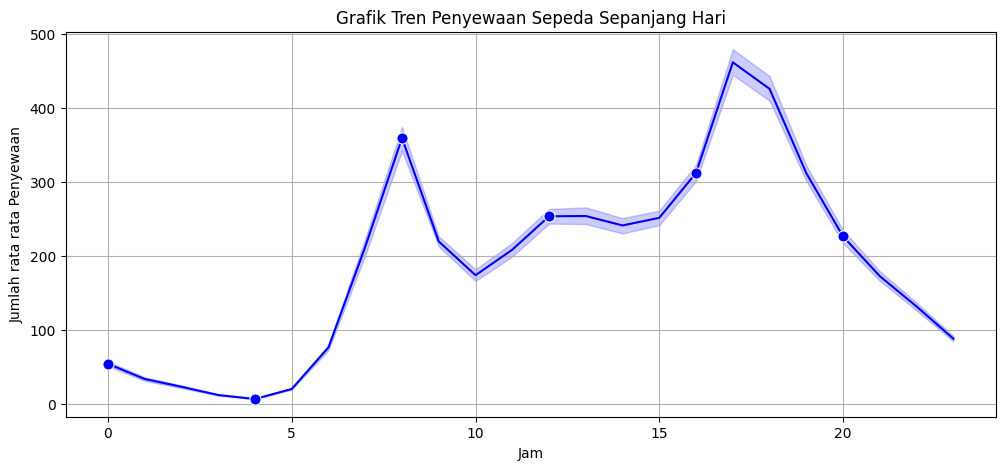

In [92]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='hr', y='cnt_hour', data=bike_df, marker='o', markersize=8, markevery=4, linestyle='-', color='b')
plt.xlabel('Jam')
plt.ylabel('Jumlah rata rata Penyewaan')
plt.title('Grafik Tren Penyewaan Sepeda Sepanjang Hari')
plt.grid(True)
plt.show()

### Pertanyaan 2:  Bagaimana Pola Penyewaan Sepeda Selama perminggu dan perbulannya?

In [93]:
bike_df['weekday_day'] = pd.Categorical(bike_df['weekday_day'], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
bike_df['mnth_day'] = pd.Categorical(bike_df['mnth_day'], categories=range(1, 13), ordered=True)
weekday_counts = bike_df.groupby('weekday_day', observed=False)['cnt_hour'].sum().reset_index()
month_counts = bike_df.groupby('mnth_day', observed=False)['cnt_hour'].sum().reset_index()
top3_weekday = weekday_counts.nlargest(3, 'cnt_hour')['weekday_day'].values
top3_month = month_counts.nlargest(3, 'cnt_hour')['mnth_day'].values

base_color = '#f4a582'
highlight_color = '#b2182b'
weekday_colors = [highlight_color if x in top3_weekday else base_color for x in weekday_counts['weekday_day']]
month_colors = [highlight_color if x in top3_month else base_color for x in month_counts['mnth_day']]

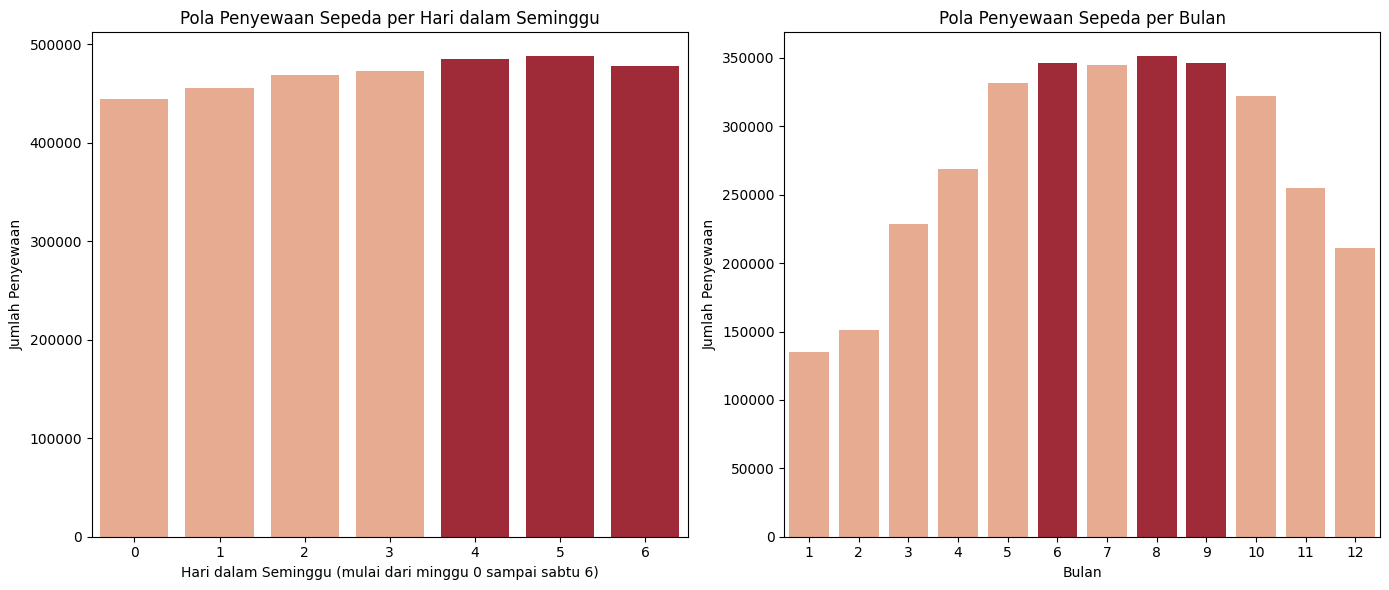

In [94]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weekday_day', y='cnt_hour', hue='weekday_day', data=weekday_counts, palette=weekday_colors, legend=False)
plt.title("Pola Penyewaan Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (mulai dari minggu 0 sampai sabtu 6)")
plt.ylabel("Jumlah Penyewaan")

plt.subplot(1, 2, 2)
sns.barplot(x='mnth_day', y='cnt_hour', hue='mnth_day', data=month_counts, palette=month_colors, legend=False)
plt.title("Pola Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana Distribusi Penyewaan Sepeda Berdasarkan Musim?

In [95]:
season_counts = bike_df.groupby('season_day', observed=False)['cnt_hour'].sum()
custom_colors = ['#488f31', '#86b970', '#f7e384', '#f09452']
season_labels = {
    1: 'Spring',2: 'Summer', 3: 'Fall', 4: 'Winter'
}

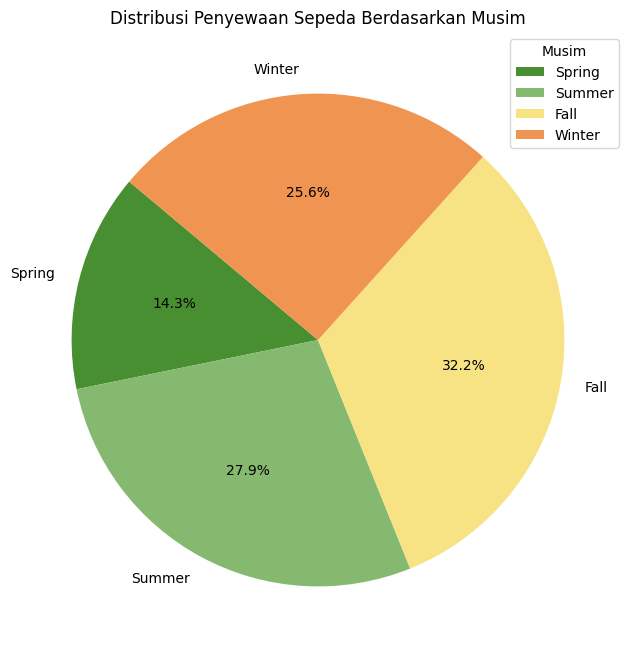

In [96]:
season_labels_mapped = [season_labels[s] for s in season_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_labels_mapped, autopct='%1.1f%%', colors=custom_colors, startangle=140)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.legend(title='Musim', loc="upper right")
plt.show()

### Pertanyaan 4: Bagaimana Perbandingan Penyewaan Sepeda Antara Pengguna Kasual dan Terdaftar?

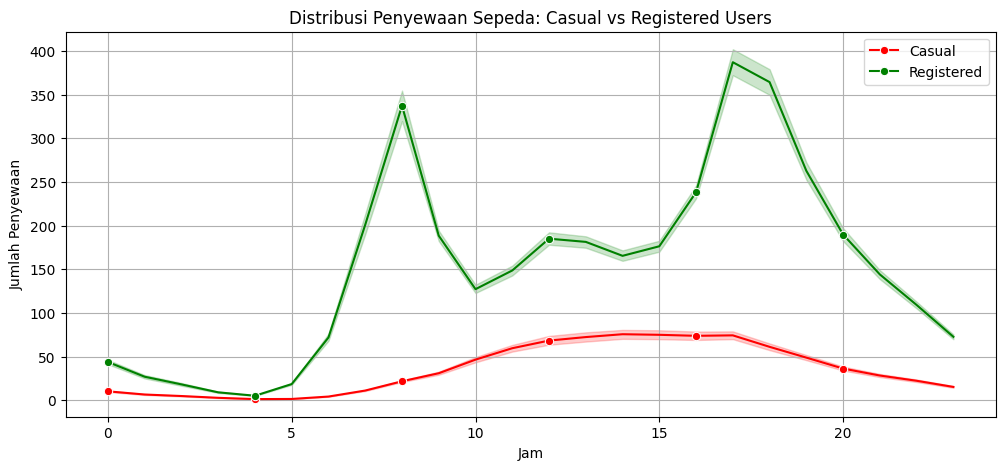

In [97]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='hr', y='casual_hour', data=bike_df, label='Casual', marker='o', markevery=4, color='r')
sns.lineplot(x='hr', y='registered_hour', data=bike_df, label='Registered', marker='o', markevery=4, color='g')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Distribusi Penyewaan Sepeda: Casual vs Registered Users')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 5: Pada Hari Apa Penyewaan Sepeda Mencapai Jumlah Tertinggi dan Terendah?

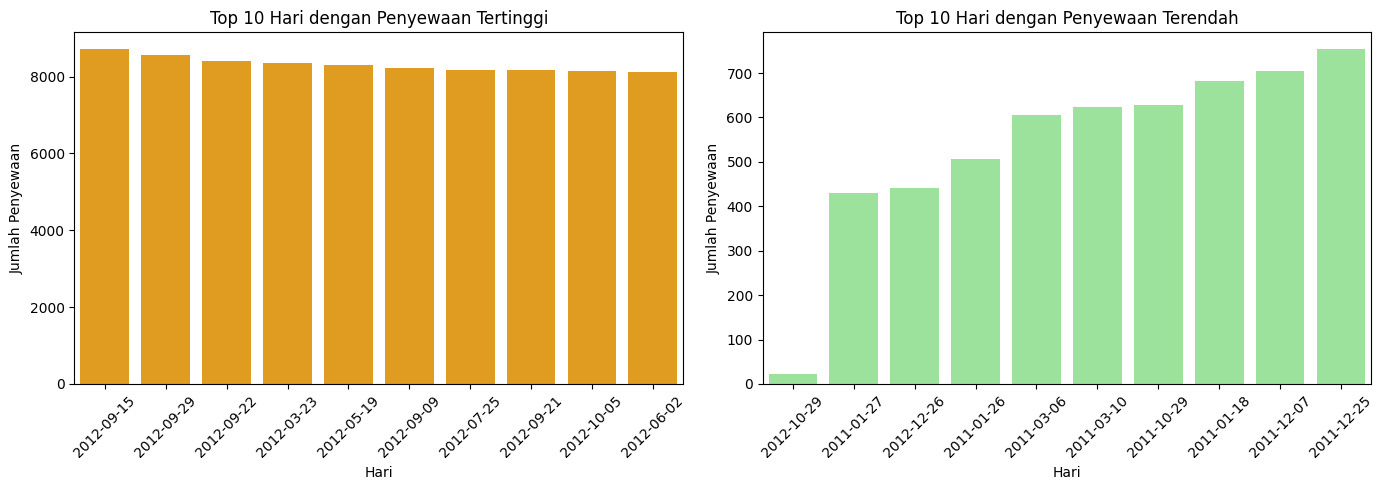

In [98]:
daily_rentals = bike_df.groupby('dteday')['cnt_day'].first().reset_index()

top10_days = daily_rentals.nlargest(10, 'cnt_day').reset_index(drop=True)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=top10_days.index, y='cnt_day', data=top10_days, color='orange')
plt.title('Top 10 Hari dengan Penyewaan Tertinggi')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=top10_days.index, labels=[d.strftime('%Y-%m-%d') for d in top10_days['dteday']], rotation=45)

bottom10_days = daily_rentals.nsmallest(10, 'cnt_day').reset_index(drop=True)
plt.subplot(1, 2, 2)
sns.barplot(x=bottom10_days.index, y='cnt_day', data=bottom10_days, color='lightgreen')
plt.title('Top 10 Hari dengan Penyewaan Terendah')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=bottom10_days.index, labels=[d.strftime('%Y-%m-%d') for d in bottom10_days['dteday']], rotation=45)
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

### Pertanyaan 6: Bagaimana Perilaku Penyewaan Pelanggan Berdasarkan RFM Analysis?

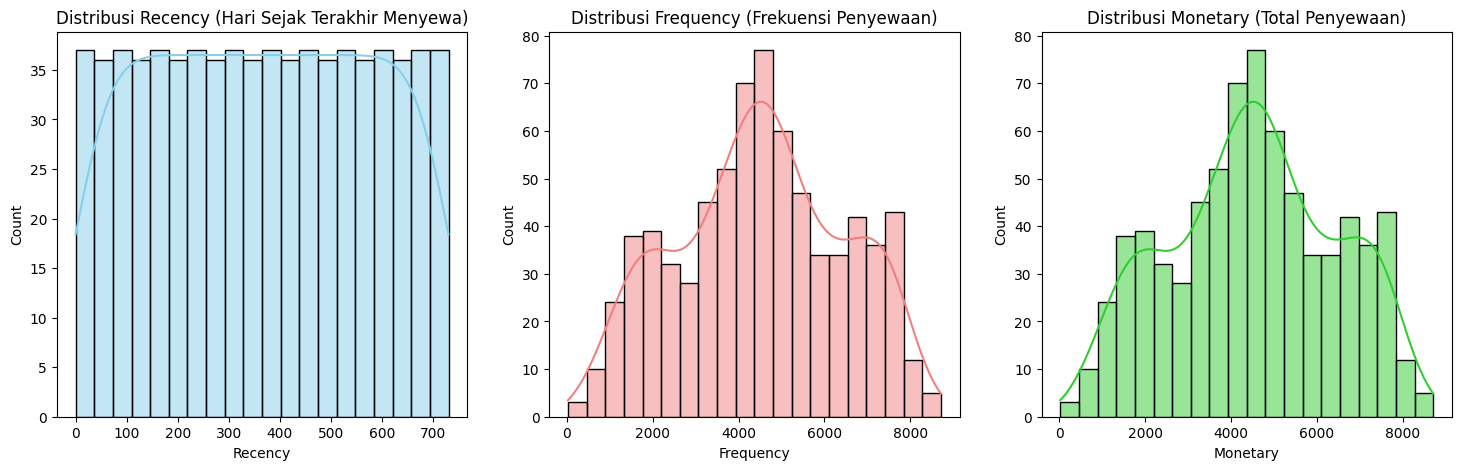

In [99]:
rfm_df = bike_df.groupby('dteday').agg({'cnt_hour': 'sum', 'casual_hour': 'sum', 'registered_hour': 'sum'}).reset_index()
rfm_df['Recency'] = (rfm_df['dteday'].max() - rfm_df['dteday']).dt.days
rfm_df['Frequency'] = rfm_df['casual_hour'] + rfm_df['registered_hour']
rfm_df['Monetary'] = rfm_df['cnt_hour']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm_df['Recency'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Recency (Hari Sejak Terakhir Menyewa)')

sns.histplot(rfm_df['Frequency'], bins=20, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribusi Frequency (Frekuensi Penyewaan)')

sns.histplot(rfm_df['Monetary'], bins=20, kde=True, ax=axes[2], color='limegreen')
axes[2].set_title('Distribusi Monetary (Total Penyewaan)')
plt.show()

### Pertanyaan 7: Bagaimana Pola Penyewaan Sepeda Berdasarkan Kategori Waktu?

In [100]:
def kategori_waktu(jam):
    if 0 <= jam <= 4:
        return "Tengah Malam"
    elif 5 <= jam <= 10:
        return "Pagi"
    elif 11 <= jam <= 14:
        return "Siang"
    elif 15 <= jam <= 18:
        return "Sore"
    else:
        return "Malam"

In [101]:
bike_df['Kategori Waktu'] = bike_df['hr'].apply(kategori_waktu)
pola_waktu_df = bike_df.groupby('Kategori Waktu')['cnt_hour'].sum().reset_index()
pola_waktu_df.rename(columns={'cnt_hour': 'Jumlah Penyewa'}, inplace=True)
kategori_urutan = ["Tengah Malam", "Pagi", "Siang", "Sore", "Malam"]
pola_waktu_df['Kategori Waktu'] = pd.Categorical(pola_waktu_df['Kategori Waktu'], categories=kategori_urutan, ordered=True)
pola_waktu_df = pola_waktu_df.sort_values('Kategori Waktu')
custom_colors = ['#de425b', '#d2c69e', '#85a776', '#488f31', '#d48d5c']

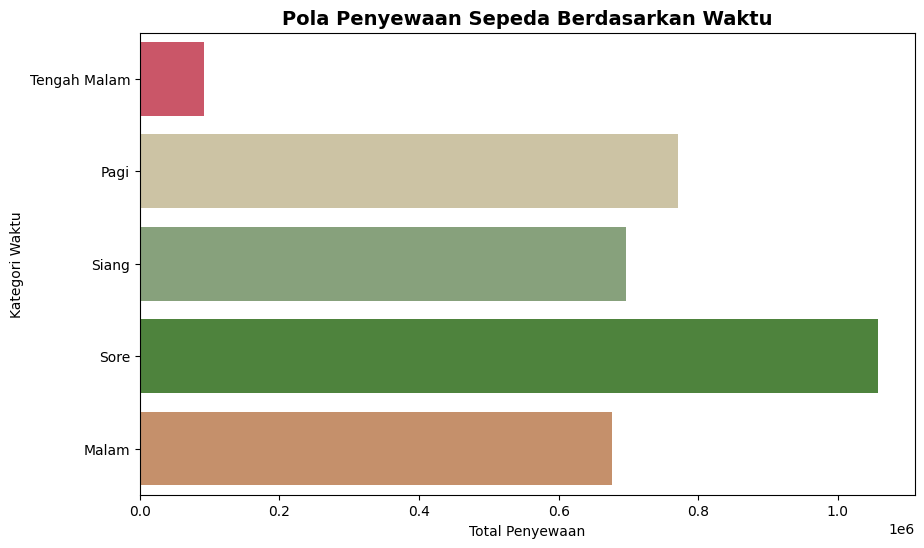

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Kategori Waktu', x='Jumlah Penyewa', hue='Kategori Waktu', data=pola_waktu_df, palette=custom_colors, legend=False)
plt.title("Pola Penyewaan Sepeda Berdasarkan Waktu", fontsize=14, fontweight="bold")
plt.ylabel("Kategori Waktu")
plt.xlabel("Total Penyewaan")
plt.show()

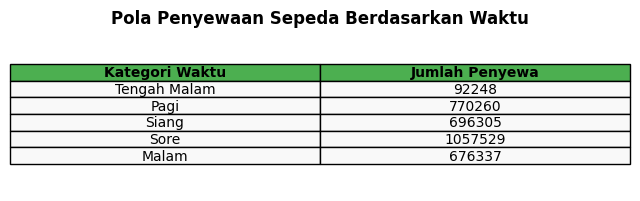

In [103]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
table = ax.table(cellText=pola_waktu_df.values.tolist(), colLabels=pola_waktu_df.columns, loc='center', cellLoc='center')
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#4CAF50')
    else:
        cell.set_facecolor('#f9f9f9')

plt.title("Pola Penyewaan Sepeda Berdasarkan Waktu", fontsize=12, fontweight="bold", pad=10)
plt.show()

## Conclusion 🎁

### **1️⃣ Rincian Jam dengan Rata-rata Jumlah Penyewaan**

In [104]:
hourly_avg_rentals = bike_df.groupby('hr', observed=False)['cnt_hour'].mean().round().astype(int).reset_index()
hourly_avg_rentals.columns = ['Jam', 'Rata-rata Penyewaan']
hourly_avg_rentals

,Jam,Rata-rata Penyewaan
0,0,54
1,1,33
2,2,23
3,3,12
4,4,6
5,5,20
6,6,76
7,7,212
8,8,359
9,9,219


Tabel ini menunjukkan bahwa penyewaan sepeda **paling tinggi terjadi pada jam 17:00-18:00,** dengan puncaknya pada jam 17:00 (461 penyewaan), sementara **jam terendah tercatat pada dini hari** (jam 4 pagi, hanya 6 penyewaan).

Secara umum, **penyewaan meningkat pada pagi hari (7-9 pagi) dan sore hari (17-18)**, yang mencerminkan tren penggunaan sepeda untuk aktivitas pagi dan sore, seperti berolahraga atau pergi bekerja. Sebaliknya, pada malam hari setelah jam 20:00, permintaan menurun signifikan.

Rekomendasi strategi bisnis yang bisa diterapkan, **untuk jam puncak, pengelola harus memastikan ketersediaan sepeda cukup, terutama pada sore hari,** dan bisa menawarkan promosi di pagi hari untuk menarik lebih banyak pelanggan. **Untuk jam dengan permintaan rendah, seperti dini hari, pengelola bisa mengurangi jumlah sepeda atau mempertimbangkan layanan khusus sesuai permintaan**. Selain itu, fokuskan distribusi sepeda di area dengan permintaan tinggi, seperti pusat kota dan kawasan perkantoran.

rekomendasi

## **2️⃣ Pola Penyewaan Sepeda per Hari dan Bulan**

In [105]:
bike_df['weekday_hour'] = pd.Categorical(bike_df['weekday_hour'], categories=[0,1,2,3,4,5,6], ordered=True)
bike_df['month_hour'] = pd.Categorical(bike_df['mnth_hour'], categories=range(1, 13), ordered=True)
weekday_mapping = { 0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

In [106]:
weekday_counts = bike_df.groupby('weekday_hour', observed=False)['cnt_hour'].sum().reset_index()
weekday_counts = weekday_counts.rename(columns={'weekday_hour': 'Hari'})
weekday_counts['Hari'] = weekday_counts['Hari'].astype('category')
weekday_counts['Hari'] = weekday_counts['Hari'].cat.rename_categories(weekday_mapping)
print("Jumlah Penyewaan Sepeda per Hari")
print(weekday_counts)

Jumlah Penyewaan Sepeda per Hari
     Hari  cnt_hour
0  Minggu    444027
1   Senin    455503
2  Selasa    469109
3    Rabu    473048
4   Kamis    485395
5   Jumat    487790
6   Sabtu    477807


Data diatas menunjukkan jumlah penyewaan sepeda per hari dalam seminggu, dengan hari Jumat mencatatkan jumlah penyewaan tertinggi (487.790), diikuti Kamis (485.395), dan Sabtu (477.807). Sementara itu, Minggu memiliki jumlah penyewaan terendah (444.027), yang mungkin dipengaruhi oleh orang-orang yang lebih memilih untuk beristirahat atau melakukan kegiatan lain di akhir pekan.

In [107]:
month_mapping = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
month_counts = bike_df.groupby('month_hour', observed=False)['cnt_hour'].sum().reset_index()
month_counts.columns = ['Bulan', 'Jumlah Penyewaan']
month_counts['Bulan'] = month_counts['Bulan'].astype('category')
month_counts['Bulan'] = month_counts['Bulan'].cat.rename_categories(month_mapping)
print("\nJumlah Penyewaan Sepeda per Bulan")
print(month_counts)


Jumlah Penyewaan Sepeda per Bulan
        Bulan  Jumlah Penyewaan
0     Januari            134933
1    Februari            151352
2       Maret            228920
3       April            269094
4         Mei            331686
5        Juni            346342
6        Juli            344948
7     Agustus            351194
8   September            345991
9     Oktober            322352
10   November            254831
11   Desember            211036


Data diatas ini menunjukkan jumlah penyewaan sepeda per bulan, dengan bulan Agustus mencatatkan jumlah penyewaan tertinggi (351.194), diikuti bulan Juni dan Juli. Sebaliknya, Desember mencatatkan jumlah penyewaan terendah (211.036), yang mungkin dipengaruhi oleh cuaca yang lebih dingin dan musim liburan.

In [108]:
year_counts = bike_df.groupby('yr_hour', observed=False)['cnt_hour'].sum().reset_index()
year_counts.columns = ['Tahun', 'Jumlah Penyewaan']
year_counts['Tahun'] = year_counts['Tahun'].astype('category')
year_counts['Tahun'] = year_counts['Tahun'].cat.rename_categories({0: 2011, 1: 2012})
print("\nJumlah Penyewaan Sepeda per Tahun")
print(year_counts)


Jumlah Penyewaan Sepeda per Tahun
  Tahun  Jumlah Penyewaan
0  2011           1243103
1  2012           2049576


Dengan jumlah penyewaan meningkat signifikan dari tahun 2011 (1.243.103) menjadi 2.049.576 pada tahun 2012. Peningkatan ini menunjukkan adanya pertumbuhan yang positif dalam penggunaan sepeda.

Berdasarkan analisis pola penyewaan sepeda, terdapat beberapa wawasan yang dapat dimanfaatkan untuk strategi bisnis.

1. Pertama, penyewaan sepeda lebih banyak terjadi pada pagi hingga sore hari, dengan puncak pada jam 17-18, yang menunjukkan tingginya permintaan pada jam-jam sibuk, baik di pagi hari maupun saat sore hari setelah bekerja. Oleh karena itu, **pengelola layanan sepeda bisa menyesuaikan operasional dengan menambah jumlah sepeda di titik-titik ramai pada jam-jam tersebut** dan memperkenalkan **paket promosi untuk mendorong penyewaan** pada jam yang lebih rendah.

2. Kedua, pola penyewaan menunjukkan adanya kenaikan signifikan pada hari kerja, terutama Kamis dan Jumat, dan penurunan pada hari Minggu. **Pengelola bisa mempertimbangkan untuk memberikan diskon atau promosi khusus pada akhir pekan** untuk meningkatkan penyewaan di hari Minggu yang lebih rendah.

3. Terakhir, data penyewaan per bulan menunjukkan tren kenaikan yang stabil, dengan puncaknya terjadi pada bulan Juni hingga Agustus, yang bertepatan dengan liburan musim panas. Untuk mengoptimalkan pendapatan, **pengelola bisa merencanakan strategi promosi yang lebih agresif di bulan-bulan tersebut, seperti paket liburan, serta meningkatkan jumlah sepeda dan lokasi penyewaan di area wisata atau tempat-tempat dengan banyak aktivitas luar ruangan**. Semua strategi ini harus dipadukan dengan peningkatan fasilitas dan pengalaman pengguna untuk menarik dan mempertahankan pelanggan.

## **3️⃣ Distribusi Penyewaan Sepeda Berdasarkan Musim**

In [109]:
season_mapping = {
    1: 'Musim Semi (Spring)',
    2: 'Musim Panas (Summer)',
    3: 'Musim Gugur (Fall)',
    4: 'Musim Dingin (Winter)'
}

In [110]:
bike_df['season_hour'] = bike_df['season_hour'].astype('category')
bike_df['season_hour'] = bike_df['season_hour'].cat.rename_categories(season_mapping)

season_counts = bike_df.groupby('season_hour', observed=False)['cnt_hour'].sum().reset_index()
season_counts.columns = ['Musim', 'Jumlah Penyewaan']
season_counts['Musim'] = season_counts['Musim'].replace(season_mapping)

total_rentals = season_counts['Jumlah Penyewaan'].sum()
season_counts['Persentase (%)'] = (season_counts['Jumlah Penyewaan'] / total_rentals) * 100
print("Distribusi Penyewaan Sepeda Berdasarkan Musim")
print(season_counts)

Distribusi Penyewaan Sepeda Berdasarkan Musim
                   Musim  Jumlah Penyewaan  Persentase (%)
0    Musim Semi (Spring)            471348       14.315030
1   Musim Panas (Summer)            918589       27.897921
2     Musim Gugur (Fall)           1061129       32.226919
3  Musim Dingin (Winter)            841613       25.560129


Data menunjukkan bahwa musim gugur (fall) memiliki jumlah penyewaan tertinggi, yaitu sekitar 32,23% dari total penyewaan, diikuti oleh musim panas (summer) dengan 27,90%, musim dingin (winter) sebesar 25,56%, dan musim semi (spring) yang paling rendah dengan 14,32%. Hal ini mengindikasikan bahwa **penyewaan sepeda lebih diminati pada musim gugur dan musim panas**, yang mungkin disebabkan oleh cuaca yang lebih bersahabat dan lebih banyak kegiatan luar ruangan

Rekomendasi strategi bisnis yang bisa diterapkan pengelola layanan sepeda dapat menyesuaikan stok sepeda dan fasilitas lebih banyak pada musim-musim tersebut serta mengoptimalkan strategi promosi. Misalnya, **untuk musim panas dan gugur, layanan sepeda bisa menawarkan program berlangganan atau diskon** untuk menarik lebih banyak pelanggan. Sementara **untuk musim semi dan dingin**, perlu adanya penyesuaian dengan memperkenalkan **diskon atau promo menarik** untuk menarik pelanggan, **misalnya paket keluarga atau layanan pengantaran sepeda ke lokasi tertentu** yang lebih nyaman bagi pelanggan **di musim yang lebih dingin**.

Rekomendasi

## **4️⃣ Perbandingan Pengguna Kasual dan Terdaftar dalam Penyewaan**

In [111]:
total_counts = bike_df[['casual_hour', 'registered_hour', 'cnt_hour']].sum().reset_index()
total_counts.columns = ['Tipe Pengguna', 'Jumlah Penyewaan']
total_counts['Tipe Pengguna'] = total_counts['Tipe Pengguna'].replace({
    'casual_hour': 'Penyewa Tidak Terdaftar',
    'registered_hour': 'Penyewa Terdaftar',
    'cnt_hour': 'Total Penyewaan'
})
print("Jumlah Total Penyewaan Kasual, Terdaftar, dan Total Keseluruhan")
print(total_counts)

Jumlah Total Penyewaan Kasual, Terdaftar, dan Total Keseluruhan
             Tipe Pengguna  Jumlah Penyewaan
0  Penyewa Tidak Terdaftar            620017
1        Penyewa Terdaftar           2672662
2          Total Penyewaan           3292679


Dari data, penyewa terdaftar mendominasi jumlah penyewaan dengan 2.672.662 penyewaan, sementara penyewa tidak terdaftar hanya 620.017. Total keseluruhan penyewaan mencapai 3.292.679.
Hal ini menunjukkan bahwa **pelanggan yang terdaftar lebih sering menggunakan layanan sepeda** dibandingkan dengan yang tidak terdaftar.

Rekomendasi bisnis **fokus pada peningkatan jumlah penyewa terdaftar melalui insentif atau diskon bagi pengguna baru**. Selain itu, beri keuntungan eksklusif untuk penyewa terdaftar dan sediakan kemudahan pendaftaran bagi yang belum terdaftar agar dapat menarik lebih banyak pengguna.

## **5️⃣ Hari dengan Penyewaan Sepeda Tertinggi dan Terendah**

In [112]:
top10_days.columns = ['Tanggal', 'Jumlah Penyewaan']
print("\nTop 10 Hari dengan Penyewaan Sepeda Tertinggi:")
print(top10_days)


Top 10 Hari dengan Penyewaan Sepeda Tertinggi:
     Tanggal  Jumlah Penyewaan
0 2012-09-15              8714
1 2012-09-29              8555
2 2012-09-22              8395
3 2012-03-23              8362
4 2012-05-19              8294
5 2012-09-09              8227
6 2012-07-25              8173
7 2012-09-21              8167
8 2012-10-05              8156
9 2012-06-02              8120


Dari data diatas , hari-hari dengan penyewaan sepeda tertinggi terjadi pada tanggal 15 September 2012 dengan 8.714 penyewaan, diikuti oleh beberapa hari lainnya di bulan September 2012, serta beberapa hari di bulan lainnya seperti Maret, Mei, Juli, dan Juni.

In [113]:
top10_lowest_days = daily_rentals.nsmallest(10, 'cnt_day').reset_index(drop=True)
top10_lowest_days.columns = ['Tanggal', 'Jumlah Penyewaan']
print("\nTop 10 Hari dengan Penyewaan Sepeda Terendah:")
print(top10_lowest_days)


Top 10 Hari dengan Penyewaan Sepeda Terendah:
     Tanggal  Jumlah Penyewaan
0 2012-10-29                22
1 2011-01-27               431
2 2012-12-26               441
3 2011-01-26               506
4 2011-03-06               605
5 2011-03-10               623
6 2011-10-29               627
7 2011-01-18               683
8 2011-12-07               705
9 2011-12-25               754


Dari data diatas, hari-hari dengan penyewaan sepeda terendah terjadi pada tanggal 29 Oktober 2012 dengan hanya 22 penyewaan, diikuti oleh beberapa hari lainnya di bulan Januari, Maret, Desember 2011, dan Desember 2012, yang menunjukkan jumlah penyewaan yang sangat rendah.

Untuk mengoptimalkan operasional layanan penyewaan sepeda, penting untuk memperhatikan pola penyewaan berdasarkan hari dan musim. Penyewaan cenderung lebih tinggi pada hari-hari tertentu, seperti pada akhir pekan dan musim panas, sementara hari-hari tertentu seperti liburan atau cuaca buruk menunjukkan penurunan signifikan. Oleh karena itu, strategi bisnis yang dapat diterapkan termasuk **memberikan diskon atau promosi pada hari dengan penyewaan rendah**, serta **meningkatkan ketersediaan sepeda dan sumber daya pada hari dengan permintaan tinggi.** Selain itu, memanfaatkan analisis musim untuk menyesuaikan penawaran dan kampanye pemasaran juga dapat membantu memaksimalkan penyewaan sepanjang tahun.

## **6️⃣ Segmentasi Pelanggan Berdasarkan RFM Analysis**

### **Recency (R)** Seberapa baru pelanggan terakhir menyewa sepeda

In [114]:
recency_df = bike_df.groupby('registered_day')['dteday'].max().reset_index()
recency_df['Recency'] = (pd.to_datetime(day_df['dteday'].max()) - pd.to_datetime(recency_df['dteday'])).dt.days
recency_df = recency_df[['registered_day', 'Recency']]

recency_high = recency_df.sort_values(by='Recency', ascending=False).head(10)
recency_low = recency_df.sort_values(by='Recency', ascending=True).head(10)
print("10 Pelanggan dengan Recency Tertinggi (Paling Lama Tidak Menyewa)")
print(recency_high)
print("10 Pelanggan dengan Recency Terendah (Paling Baru Menyewa)")
print(recency_low)

10 Pelanggan dengan Recency Tertinggi (Paling Lama Tidak Menyewa)
    registered_day  Recency
9              654      730
11             670      729
41            1229      728
71            1518      725
50            1362      724
21             891      723
14             768      722
44            1280      721
39            1220      720
34            1137      719
10 Pelanggan dengan Recency Terendah (Paling Baru Menyewa)
     registered_day  Recency
145            2290        0
58             1432        1
36             1182        2
163            2451        3
111            1867        4
2               432        5
7               573        6
13              746        7
55             1379        8
73             1544        9


Data diatas menunjukkan bahwa **sebagian besar pelanggan yang terakhir menyewa sepeda dalam waktu yang sangat dekat** adalah pengguna baru. Di sisi lain, pelanggan dengan recency tinggi menunjukkan bahwa mereka sudah lama tidak menggunakan layanan.

Untuk pelanggan dengan recency rendah (paling baru menyewa), pendekatan yang dapat dilakukan adalah memberikan penawaran atau insentif untuk mendorong mereka melakukan penyewaan berulang, misalnya dengan memberikan potongan harga atau promosi untuk mereka yang menyewa dalam waktu dekat.

### **Frequency (F)** Seberapa sering pelanggan melakukan penyewaan

In [115]:
frequency_df = bike_df.groupby('registered_day')['cnt_day'].count().reset_index()
frequency_df.columns = ['Pelanggan', 'Frequency']
frequency_high = frequency_df.sort_values(by='Frequency', ascending=False).head(10)
frequency_low = frequency_df.sort_values(by='Frequency', ascending=True).head(10)
print("10 Pelanggan dengan Frequency Tertinggi (Paling Sering Menyewa)")
print(frequency_high)
print("10 Pelanggan dengan Frequency Terendah (Paling Jarang Menyewa)")
print(frequency_low)

10 Pelanggan dengan Frequency Tertinggi (Paling Sering Menyewa)
     Pelanggan  Frequency
634       6248         72
513       4841         72
95        1707         70
387       3840         48
159       2419         48
422       4044         48
449       4232         48
476       4446         48
474       4429         48
237       3107         48
10 Pelanggan dengan Frequency Terendah (Paling Jarang Menyewa)
     Pelanggan  Frequency
0           20          1
1          416          8
29        1009         11
4          472         16
219       2919         17
20         889         18
54        1376         18
39        1220         22
41        1229         22
51        1365         22


Hasil dari ada diatas  menunjukkan pelanggan dengan penyewaan sering (high frequency) adalah pelanggan loyal. Untuk mereka, program loyalitas dan reward bisa diterapkan untuk meningkatkan kepuasan dan frekuensi sewa. Sedangkan untuk pelanggan jarang menyewa (low frequency), menawarkan diskon atau paket menarik bisa menjadi strategi untuk menarik mereka kembali dan meningkatkan frekuensi penyewaan.


### **Monetary (M)** Total jumlah penyewaan yang dilakukan oleh pelanggan

In [116]:
frequency_df = bike_df.groupby('registered_day')['cnt_day'].count().reset_index()
frequency_df.columns = ['Pelanggan', 'Frequency']
frequency_high = frequency_df.sort_values(by='Frequency', ascending=False).head(10)
frequency_low = frequency_df.sort_values(by='Frequency', ascending=True).head(10)
print("10 Pelanggan dengan Frequency Tertinggi (Paling Sering Menyewa)")
print(frequency_high)
print("10 Pelanggan dengan Frequency Terendah (Paling Jarang Menyewa)")
print(frequency_low)

10 Pelanggan dengan Frequency Tertinggi (Paling Sering Menyewa)
     Pelanggan  Frequency
634       6248         72
513       4841         72
95        1707         70
387       3840         48
159       2419         48
422       4044         48
449       4232         48
476       4446         48
474       4429         48
237       3107         48
10 Pelanggan dengan Frequency Terendah (Paling Jarang Menyewa)
     Pelanggan  Frequency
0           20          1
1          416          8
29        1009         11
4          472         16
219       2919         17
20         889         18
54        1376         18
39        1220         22
41        1229         22
51        1365         22


Pelanggan dengan Monetary tertinggi adalah pelanggan yang secara konsisten menghasilkan pendapatan tinggi, dan mereka bisa diberikan penghargaan berupa diskon eksklusif atau layanan premium. Untuk pelanggan dengan Monetary terendah, memberikan penawaran atau promosi menarik bisa meningkatkan pengeluaran mereka dan meningkatkan loyalitas.

## **7️⃣ Pola Penyewaan Sepeda Berdasarkan Kategori Waktu**

In [117]:
def kategori_waktu(jam):
    if 0 <= jam <= 4:
        return "Tengah Malam"
    elif 5 <= jam <= 10:
        return "Pagi"
    elif 11 <= jam <= 14:
        return "Siang"
    elif 15 <= jam <= 18:
        return "Sore"
    else:
        return "Malam"

In [118]:
hour_df['Kategori Waktu'] = hour_df['hr'].apply(kategori_waktu)
pola_waktu_df = hour_df.groupby('Kategori Waktu')['cnt'].sum().reset_index()
pola_waktu_df.rename(columns={'cnt': 'Jumlah Penyewa'}, inplace=True)
kategori_urutan = ["Tengah Malam", "Pagi", "Siang", "Sore", "Malam"]
pola_waktu_df['Kategori Waktu'] = pd.Categorical(pola_waktu_df['Kategori Waktu'], categories=kategori_urutan, ordered=True)
pola_waktu_df = pola_waktu_df.sort_values('Kategori Waktu')
print(pola_waktu_df)

  Kategori Waktu  Jumlah Penyewa
4   Tengah Malam           92248
1           Pagi          770260
2          Siang          696305
3           Sore         1057529
0          Malam          676337


Dari data diatas menunjukkan bahwa waktu sore memiliki jumlah penyewaan tertinggi, diikuti oleh pagi, malam, tengah malam, dan siang. Hal ini mengindikasikan bahwa **pelanggan lebih banyak menyewa sepeda pada waktu sore hari, mungkin karena cuaca yang lebih nyaman atau lebih banyak aktivitas di luar**.

 Oleh karena itu, pengelola layanan sepeda dapat memfokuskan promosi pada sore hari untuk memaksimalkan penyewaan, seperti dengan memberikan diskon atau paket langganan. Untuk periode pagi dan siang, dapat dilakukan pemasaran untuk menarik pekerja atau wisatawan, misalnya dengan menawarkan harga spesial. Sementara itu, untuk malam dan tengah malam, layanan khusus seperti tur malam atau penyewaan sepeda untuk acara bisa menjadi strategi untuk meningkatkan penyewaan.